# Define figure projection
Here we should the most minimal use of `Antarctic-Plots`. This example just creates a projection in EPSG:3031, based on a region and figure height (or width). The rest of the example uses standard PyGMT calls.

Import the packages

In [2]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import fetch, utils, regions
import pygmt

Fetch the data to plot

In [3]:
bed = fetch.bedmachine(layer="bed")

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_dev\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


returning original grid


Define a region for the plot

In [10]:
# Options:

# 1) use the full extent of the grid file
# region = utils.get_grid_info(bed)[1]

# 2) use a preset region (antarctic_plots.regions())
# region = regions.antarctic_peninsula

# 3) define your own region, in meters e, w, n, s in EPSG:3031
region = [-2700e3, -2000e3, 1000e3, 2000e3]

Create a projection from the region and a figure height

In [14]:
proj_xy = utils.set_proj(region, fig_height=15)[0]

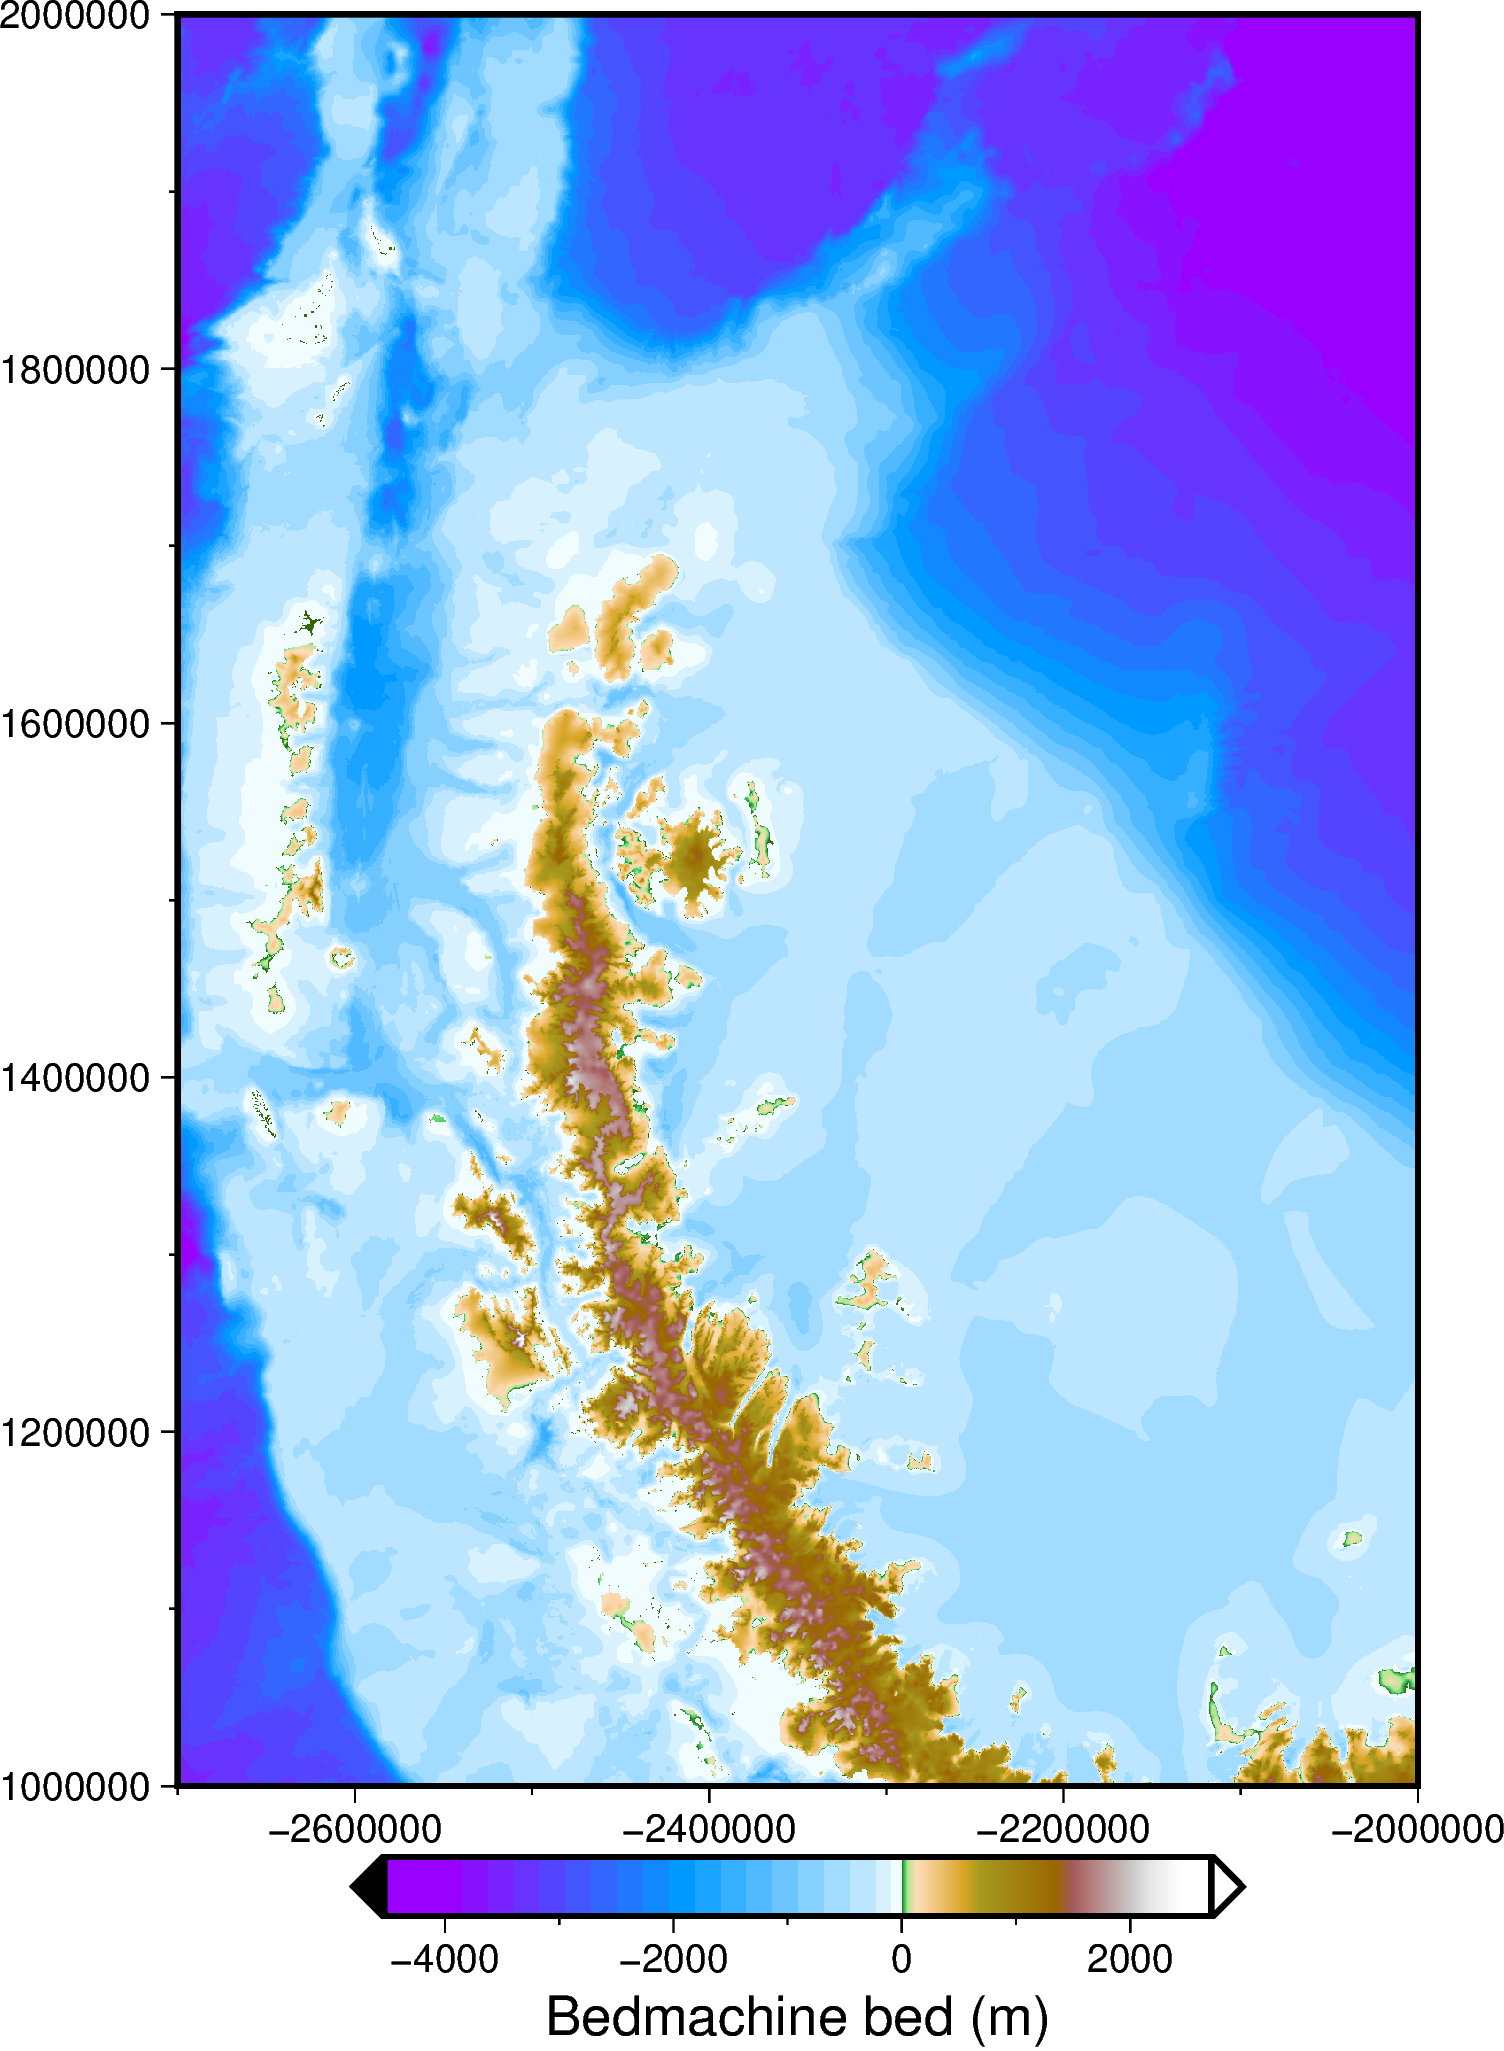

In [22]:
# use standard PyGMT commands to plot figure
fig = pygmt.Figure()

fig.grdimage(
    grid=bed,
    cmap="globe",
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display colorbar 2/3 as wide as figure
fig.colorbar(
    cmap=True,
    position=f"jBC+w{utils.get_fig_width(fig)*(2/3)}c/.5c+jTC+h+o0c/.6c+e",
    frame="xaf+lBedmachine bed (m)",
)

# save the figure to use in the Gallery examples
fig.savefig("outputs/setting_projection.png")

# display the figure
fig.show()

You can also create the projection with a given figure width instead of height

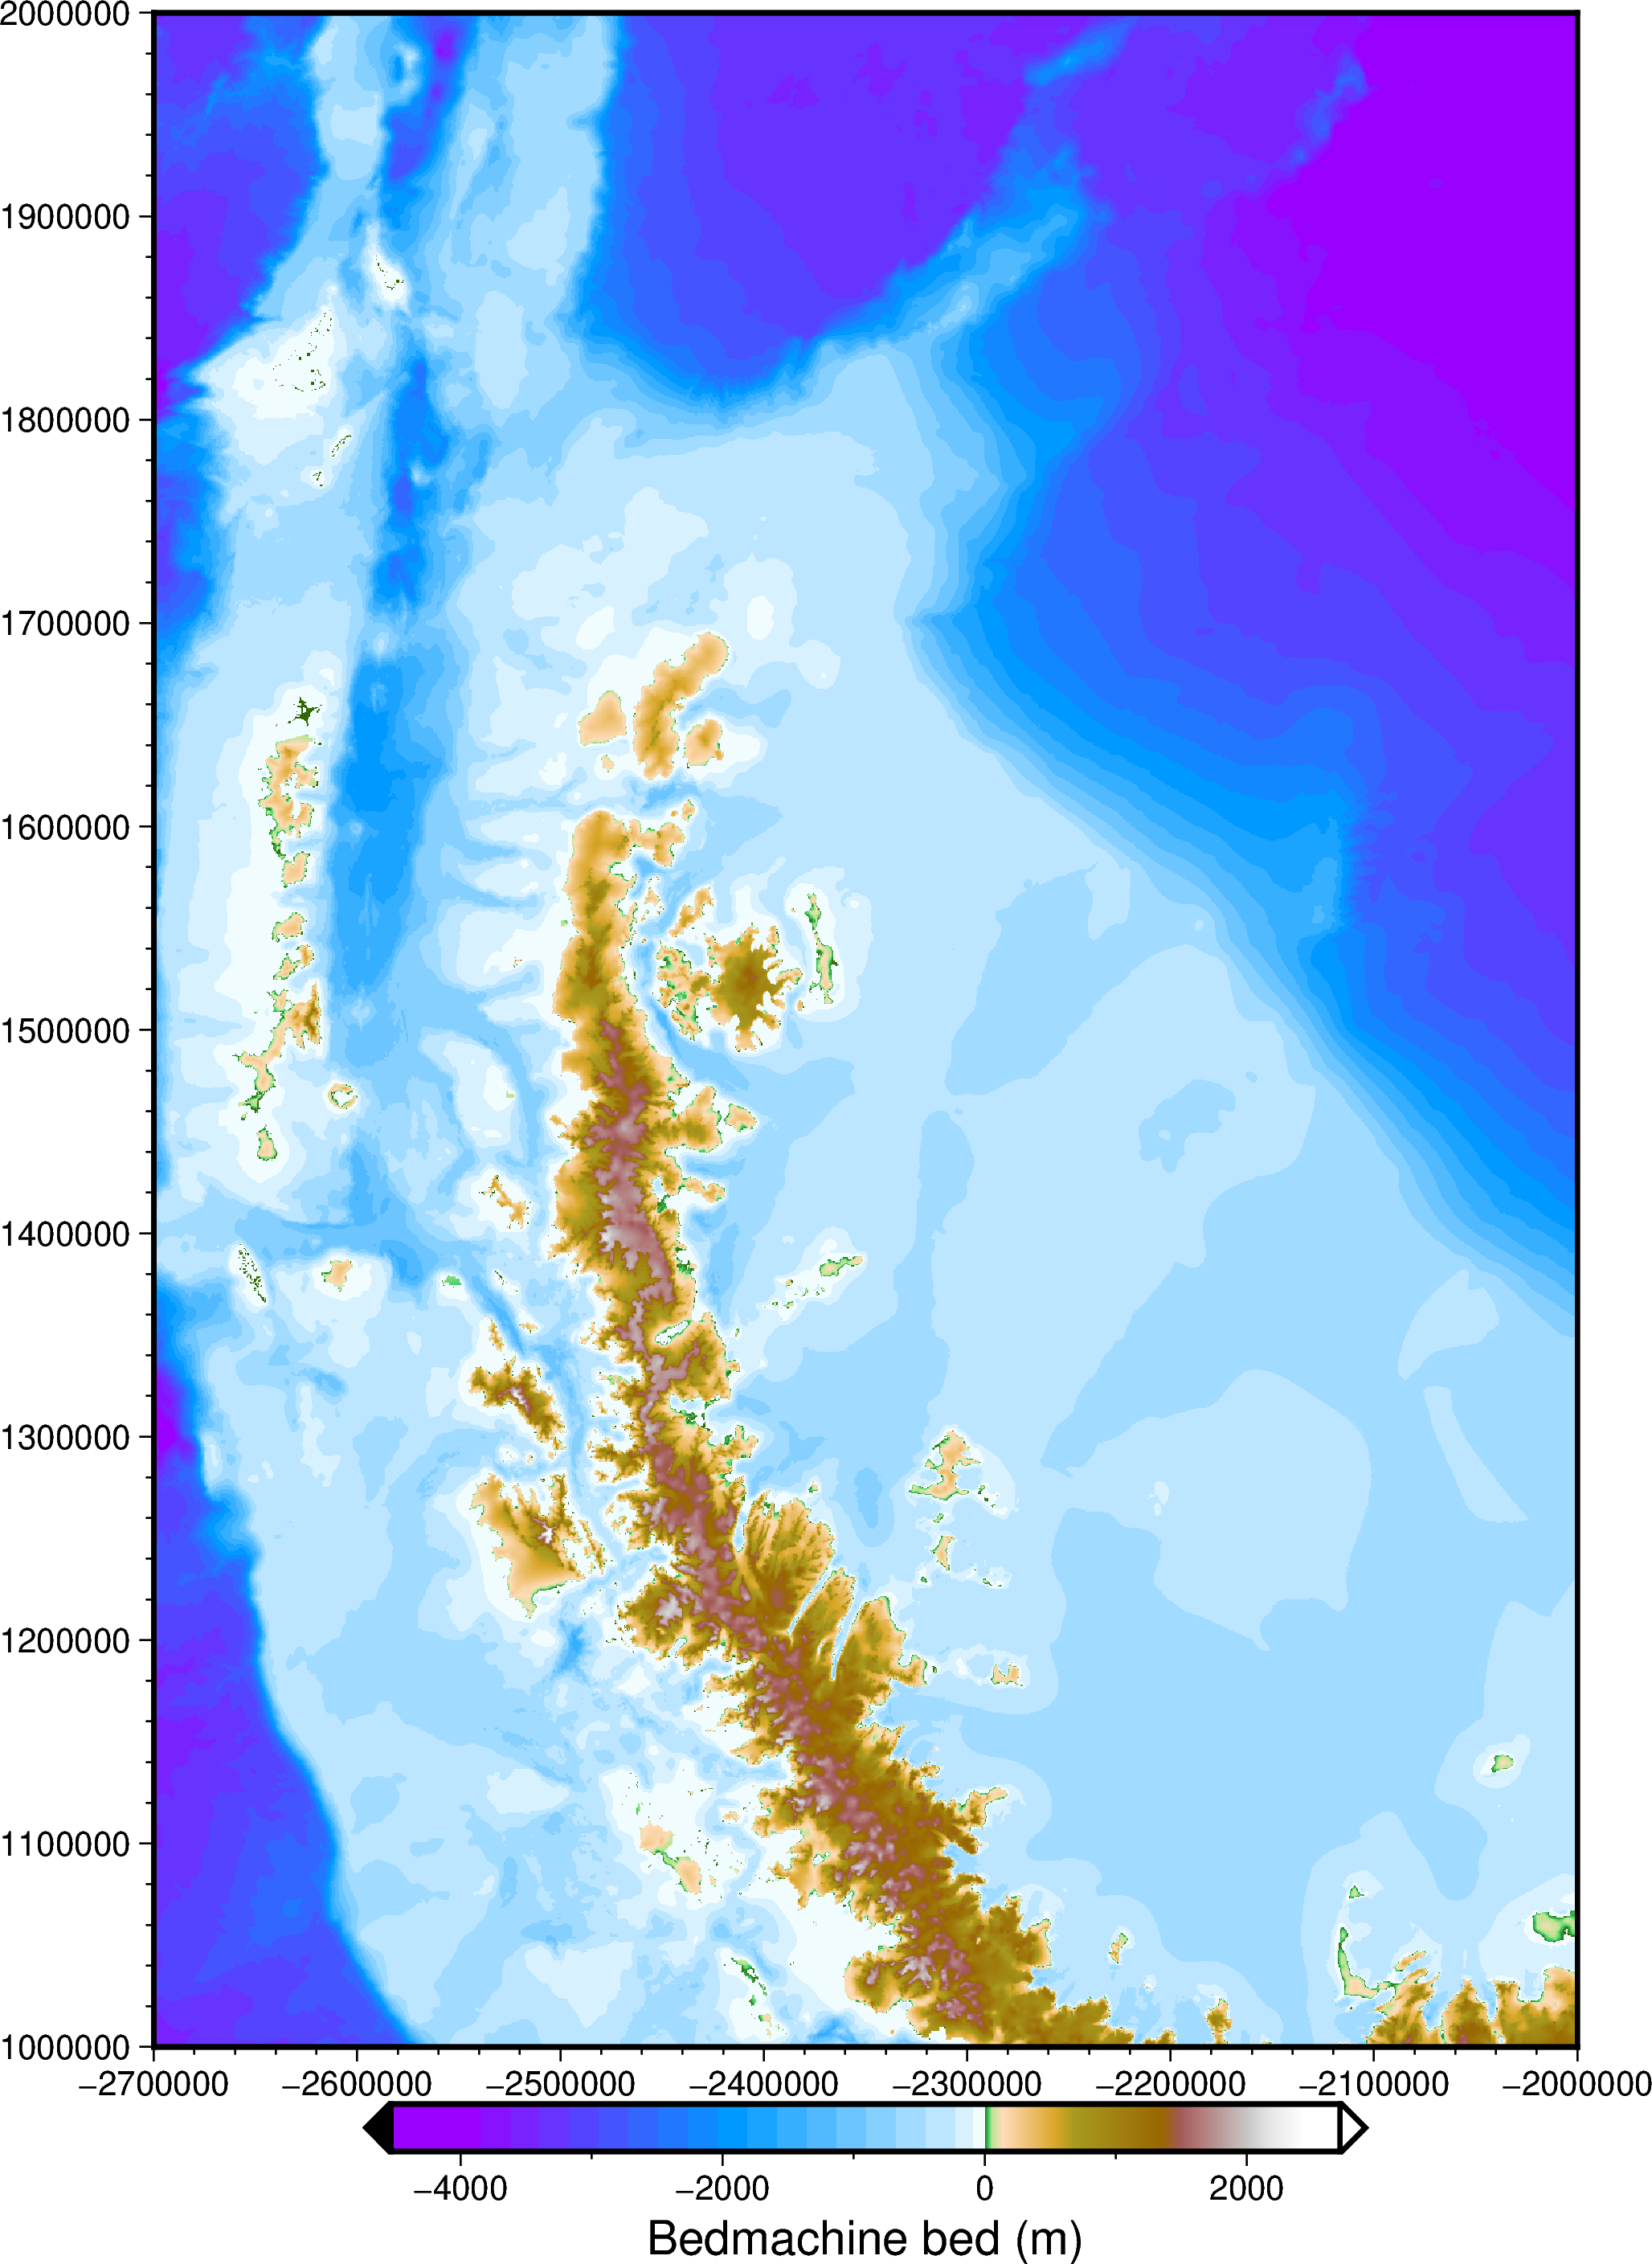

In [23]:
proj_xy = utils.set_proj(region, fig_width=15)[0]

# use standard PyGMT commands to plot figure
fig = pygmt.Figure()

fig.grdimage(
    grid=bed,
    cmap="globe",
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display colorbar 2/3 as wide as figure
fig.colorbar(
    cmap=True,
    position=f"jBC+w{utils.get_fig_width(fig)*(2/3)}c/.5c+jTC+h+o0c/.6c+e",
    frame="xaf+lBedmachine bed (m)",
)

# display the figure
fig.show()